In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import random
from collections import defaultdict
import random

In [2]:
cwd = os.getcwd()
data_dir = os.path.join(cwd, "data", "birdclef-2021")
image_dir = os.path.join(cwd, "data", "birdclef-2021-parsed", "train_short_audio")
train_sounds_dir = os.path.join(data_dir, 'train_short_audio')

In [3]:
fileMetadata = os.path.join(data_dir, 'train_metadata.csv')
metadata = pd.read_csv(fileMetadata)

In [6]:
metadata

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
0,acafly,['amegfi'],"['begging call', 'call', 'juvenile']",35.3860,-84.1250,Empidonax virescens,Acadian Flycatcher,Mike Nelson,2012-08-12,XC109605.ogg,Creative Commons Attribution-NonCommercial-Sha...,2.5,09:30,https://www.xeno-canto.org/109605
1,acafly,[],['call'],9.1334,-79.6501,Empidonax virescens,Acadian Flycatcher,Allen T. Chartier,2000-12-26,XC11209.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,?,https://www.xeno-canto.org/11209
2,acafly,[],['call'],5.7813,-75.7452,Empidonax virescens,Acadian Flycatcher,Sergio Chaparro-Herrera,2012-01-10,XC127032.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,15:20,https://www.xeno-canto.org/127032
3,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129974.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129974
4,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129981.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62869,yetvir,[],"['adult', 'male', 'song']",30.2150,-97.6505,Vireo flavifrons,Yellow-throated Vireo,Caleb Helsel,2020-07-10,XC591680.ogg,Creative Commons Attribution-NonCommercial-Sha...,1.0,08:30,https://www.xeno-canto.org/591680
62870,yetvir,[],"['life stage uncertain', 'sex uncertain', 'song']",42.3005,-72.5877,Vireo flavifrons,Yellow-throated Vireo,Christopher McPherson,2019-05-31,XC600085.ogg,Creative Commons Attribution-NonCommercial-Sha...,5.0,09:30,https://www.xeno-canto.org/600085
62871,yetvir,"['amered', 'eawpew', 'norcar', 'reevir1']","['adult', 'male', 'song']",42.3005,-72.5877,Vireo flavifrons,Yellow-throated Vireo,Christopher McPherson,2020-06-02,XC602701.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.5,08:30,https://www.xeno-canto.org/602701
62872,yetvir,[],['uncertain'],32.2357,-99.8811,Vireo flavifrons,Yellow-throated Vireo,Brad Banner,2019-04-27,XC614733.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,17:30,https://www.xeno-canto.org/614733


In [7]:
folderFile = metadata.groupby(by='primary_label')['filename'].apply(list)

In [8]:
numFilesDistribution = folderFile.str.len()

In [9]:
numFilesDistribution = numFilesDistribution.sort_values(ascending=False).reset_index(name='counts')

Text(0.5, 1.0, 'Bird song distribution')

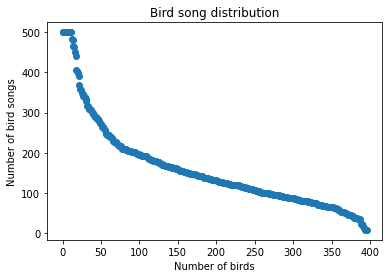

In [10]:
plt.scatter(x=numFilesDistribution.index, y=numFilesDistribution.counts)
plt.xlabel("Bird index")
plt.ylabel("Number of bird songs")
plt.title("Bird song distribution")

In [ ]:
fileSizeDistribution = defaultdict(list)
birdsDone = 0
numBirds = len(list(folderFile.keys()))
for iBird in folderFile.keys():
    birdsDone += 1
    print("Bird %d of %d" % (birdsDone, numBirds), end = '\r')
    print()
    filePath = os.path.join(train_sounds_dir, iBird)
    for iSound in folderFile[iBird]:
        fileSizeDistribution[iBird].append(librosa.get_duration(filename=os.path.join(filePath, iSound)))

In [113]:
import itertools
fileLengths = list(fileSizeDistribution.values())
fileLengths = list(itertools.chain.from_iterable(fileLengths))

Text(0.5, 1.0, 'Distribution of length of bird songs')

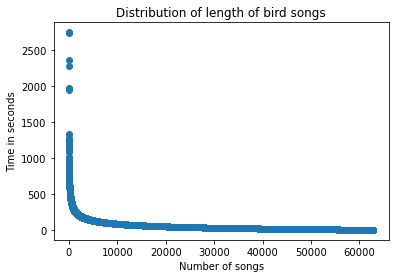

In [118]:
fileLengths = -np.sort(-np.array(fileLengths))
plt.scatter(x=np.arange(len(fileLengths)), y=fileLengths)
plt.xlabel("Song index")
plt.ylabel("Time in seconds")
plt.title("Distribution of length of bird songs")

In [148]:
numRandomBirds = 5
randomBirdSong = dict()
for iBird in range(numRandomBirds):
    randomBird = random.choice(list(folderFile.keys()))
    randomBirdSong[randomBird] = random.choice(folderFile[randomBird])

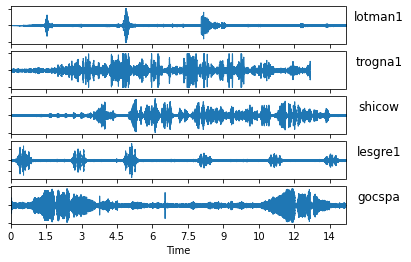

In [167]:
fig, ax = plt.subplots(nrows=5, sharex=True, sharey=False)
iPlot = 0
for bird, song in randomBirdSong.items():
    sig, rate = librosa.load(os.path.join(train_sounds_dir, bird, song), sr=32000, offset=None, duration=15)
    librosa.display.waveplot(sig, sr=32000, ax=ax[iPlot])
    ax[iPlot].set_title(bird , x=1.10, y=1.0, pad=-14)
    ax[iPlot].label_outer()
    ax[iPlot].set_yticklabels([])
    iPlot += 1

In [24]:
from collections import Counter
numImages = Counter()
imageFolders = os.listdir(image_dir)
for iBird in imageFolders:
    numImages[iBird] = len(os.listdir(os.path.join(image_dir, iBird)))

In [37]:
numImagesDistribution = pd.Series(numImages).sort_values(ascending=False).reset_index(name="numImages")

In [38]:
numImagesDistribution[numImagesDistribution['index'] == 'noise']

,index,numImages
0,noise,212254


Text(0.5, 1.0, 'Bird image distribution')

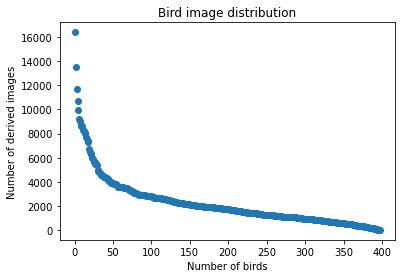

In [27]:
plt.scatter(x=numImagesDistribution[numImagesDistribution['index'] != 'noise'].index, 
            y=numImagesDistribution[numImagesDistribution['index'] != 'noise'].numImages)
plt.xlabel("Bird index")
plt.ylabel("Number of derived images")
plt.title("Bird image distribution")

In [54]:
print(f"Average number of images = {np.mean(numImagesDistribution[numImagesDistribution['index'] != 'noise'].numImages)}")
minImages = np.min(numImagesDistribution[numImagesDistribution['index'] != 'noise'].numImages)
minImageBird = numImagesDistribution[numImagesDistribution['numImages'] == minImages]['index'].item()
print(f"Bird {minImageBird} has minimum images = {minImages}")
maxImages = np.max(numImagesDistribution[numImagesDistribution['index'] != 'noise'].numImages)
maxImageBird = numImagesDistribution[numImagesDistribution['numImages'] == maxImages]['index'].item()
print(f"Bird {maxImageBird} has maximum images = {maxImages}")

Average number of images = 2251.234256926952
Bird stvhum2 has minimum images = 42
Bird cubthr has maximum images = 16379
